Import necessary libraries and required modules for data preprocessing and model evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Loading the dataset

In [2]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

Displaying the first few rows of the dataset

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking the data types of columns

In [4]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Checking for missing values in the dataset

In [5]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Exploration and Visualization

In [6]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_df.shape

(614, 13)

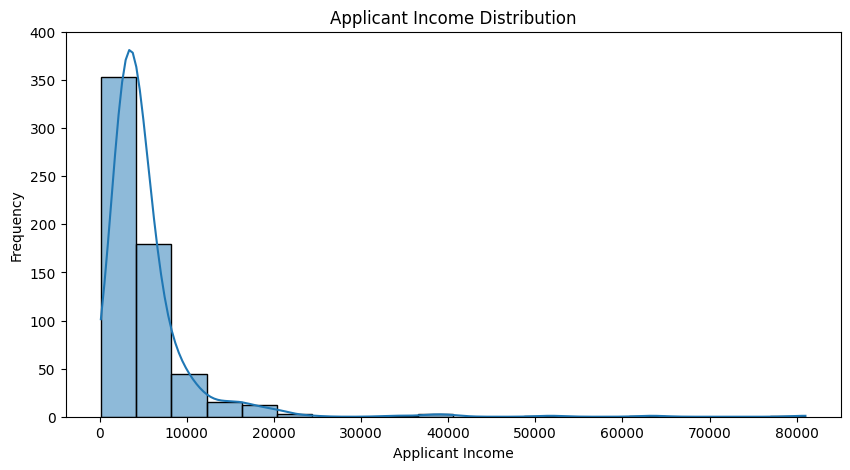

In [8]:
plt.figure(figsize=(10,5))
sb.histplot(data=loan_df, x='ApplicantIncome', bins=20, kde=True)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

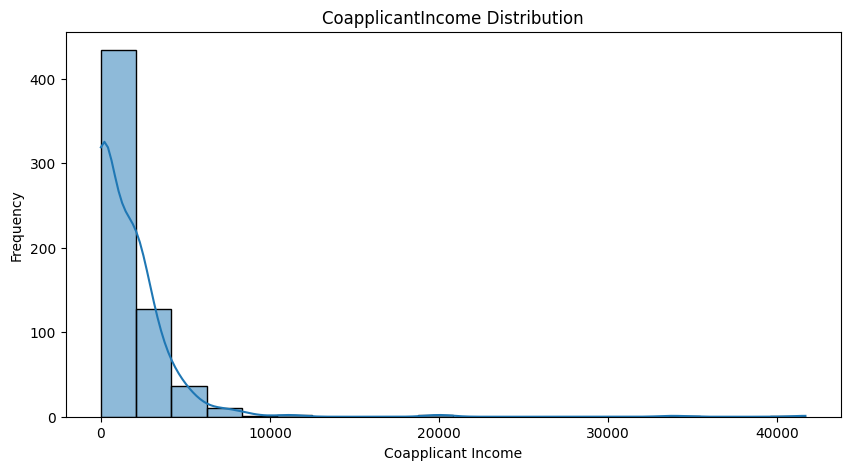

In [9]:
plt.figure(figsize=(10,5))
sb.histplot(data=loan_df, x='CoapplicantIncome', bins=20, kde=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('CoapplicantIncome Distribution')
plt.show()

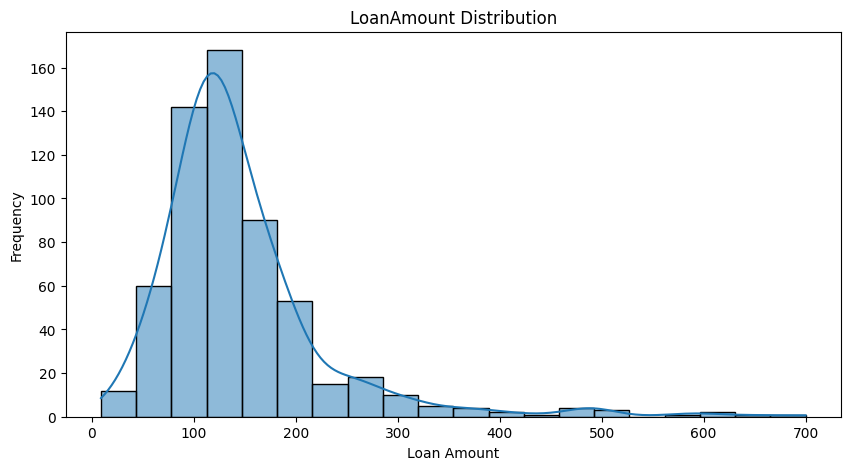

In [10]:
loan_df['LoanAmount'] = pd.to_numeric(loan_df['LoanAmount'], errors='coerce')
plt.figure(figsize=(10,5))
sb.histplot(data=loan_df, x='LoanAmount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()

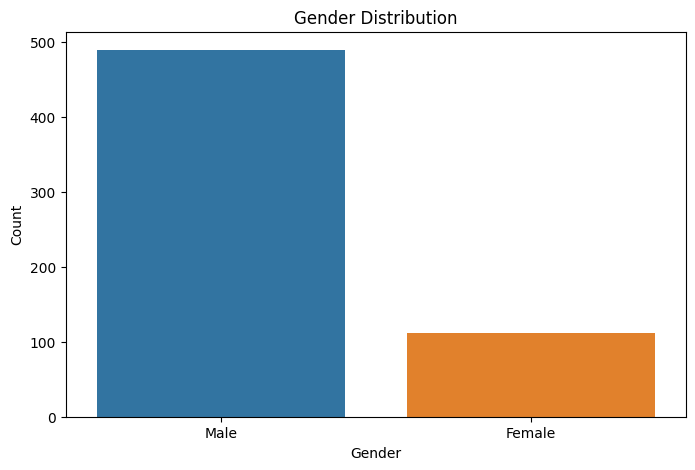

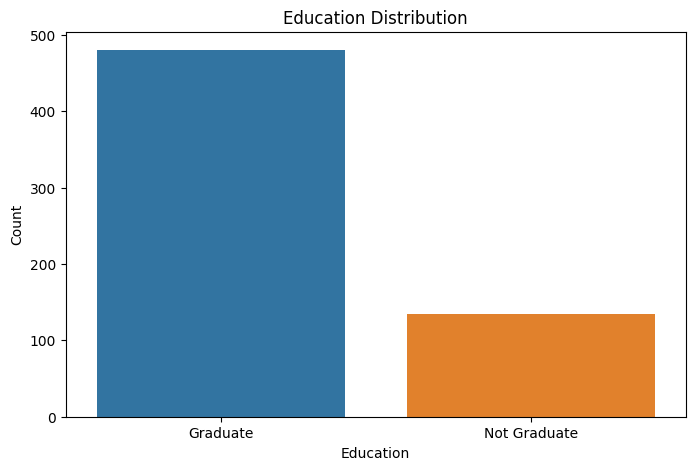

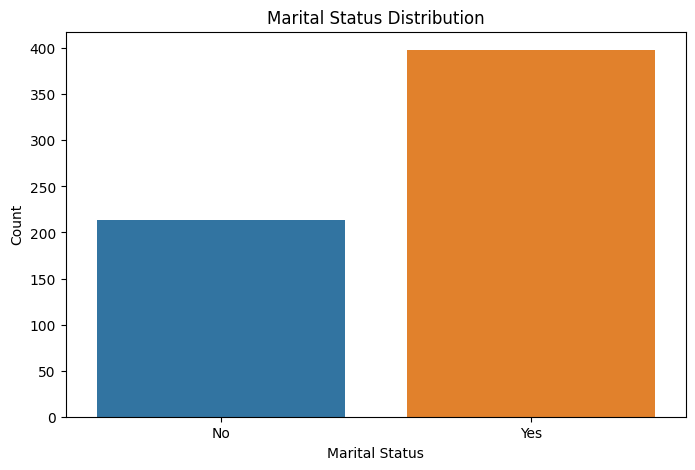

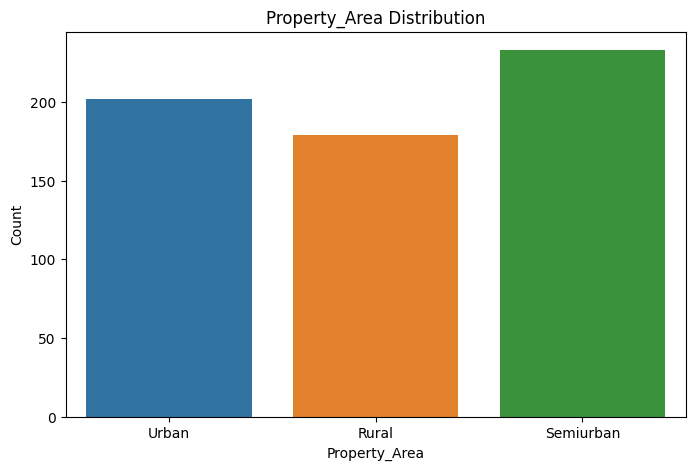

In [11]:
plt.figure(figsize=(8,5))
sb.countplot(data=loan_df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=loan_df, x='Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=loan_df, x='Married')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=loan_df, x='Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Property_Area Distribution')
plt.show()

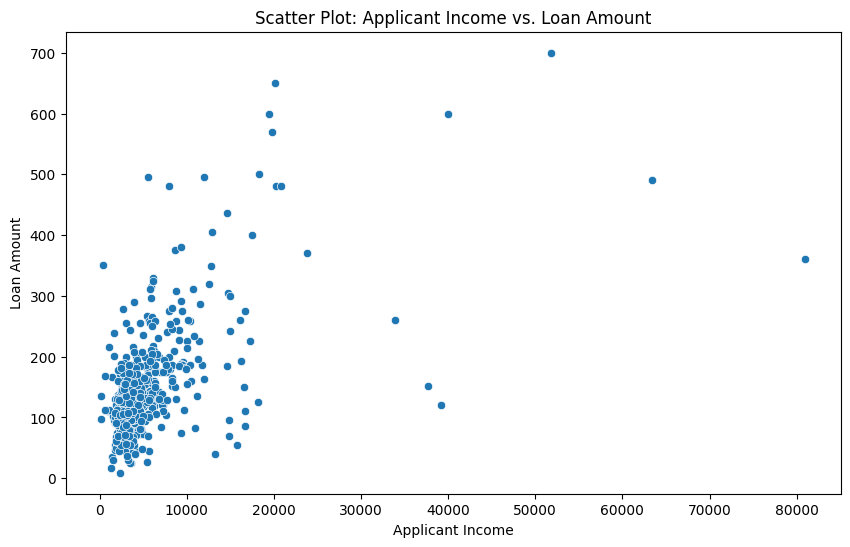

In [12]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=loan_df, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()

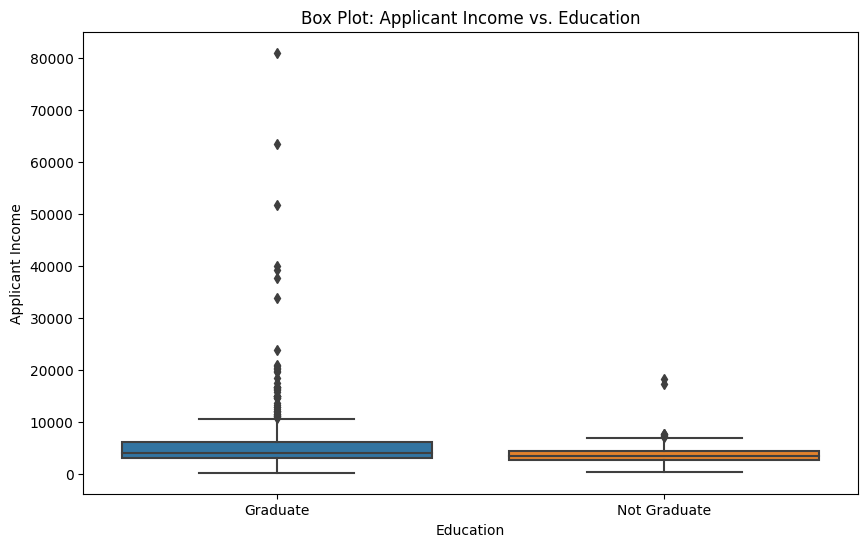

In [13]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=loan_df, x='Education', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

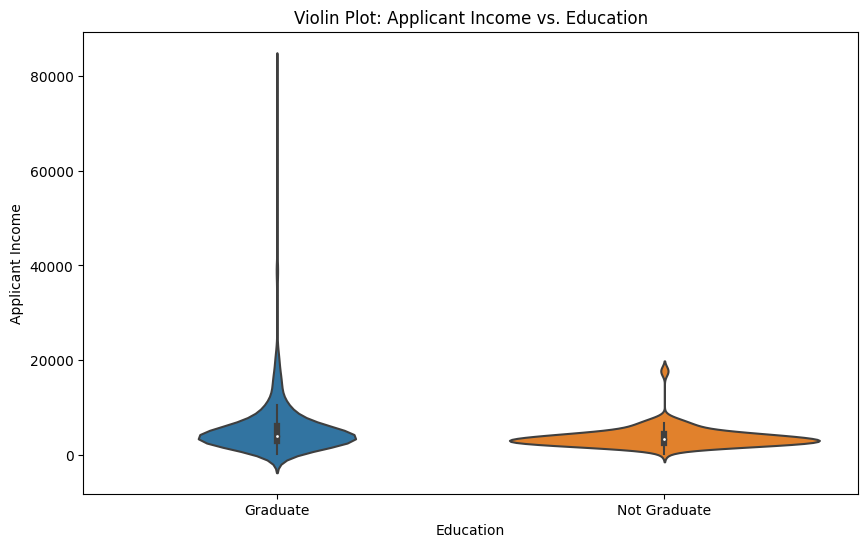

In [14]:
plt.figure(figsize=(10, 6))
sb.violinplot(data=loan_df, x='Education', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Violin Plot: Applicant Income vs. Education')
plt.show()

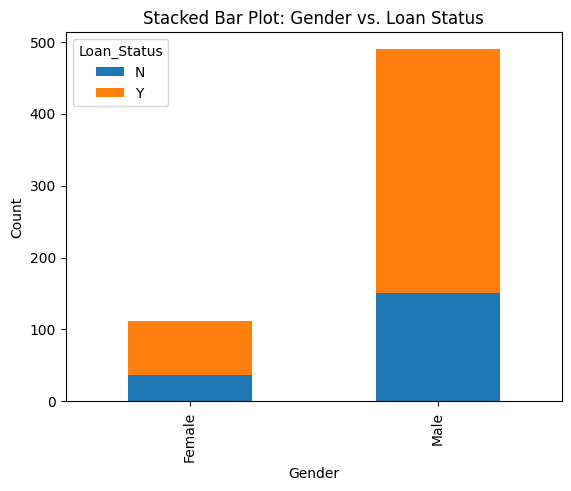

In [15]:
cross_tab = pd.crosstab(loan_df['Gender'], loan_df['Loan_Status'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Gender vs. Loan Status')
plt.show()

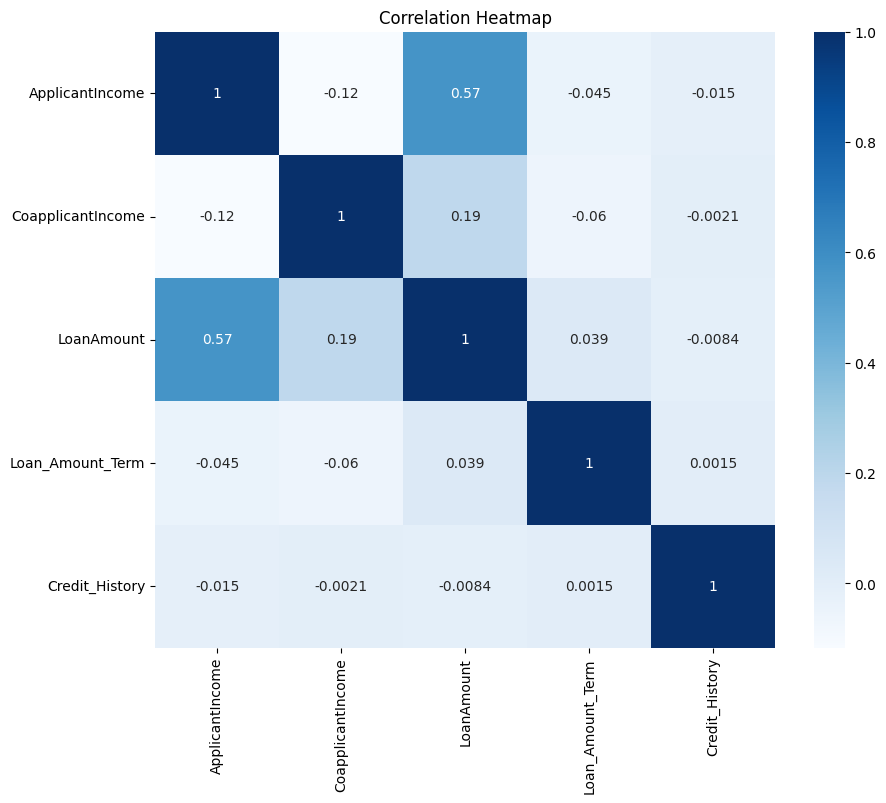

In [16]:
correlation_matrix = loan_df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

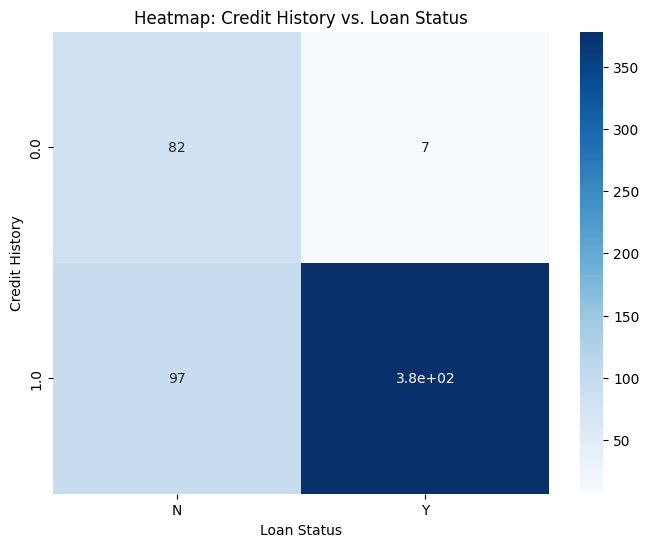

In [17]:
loan_df['Credit_History'] = pd.to_numeric(loan_df['Credit_History'], errors='coerce')
cross_tab2 = pd.crosstab(loan_df['Credit_History'], loan_df['Loan_Status'])
plt.figure(figsize=(8,6))
sb.heatmap(cross_tab2, annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel("Credit History")
plt.title('Heatmap: Credit History vs. Loan Status')
plt.show()

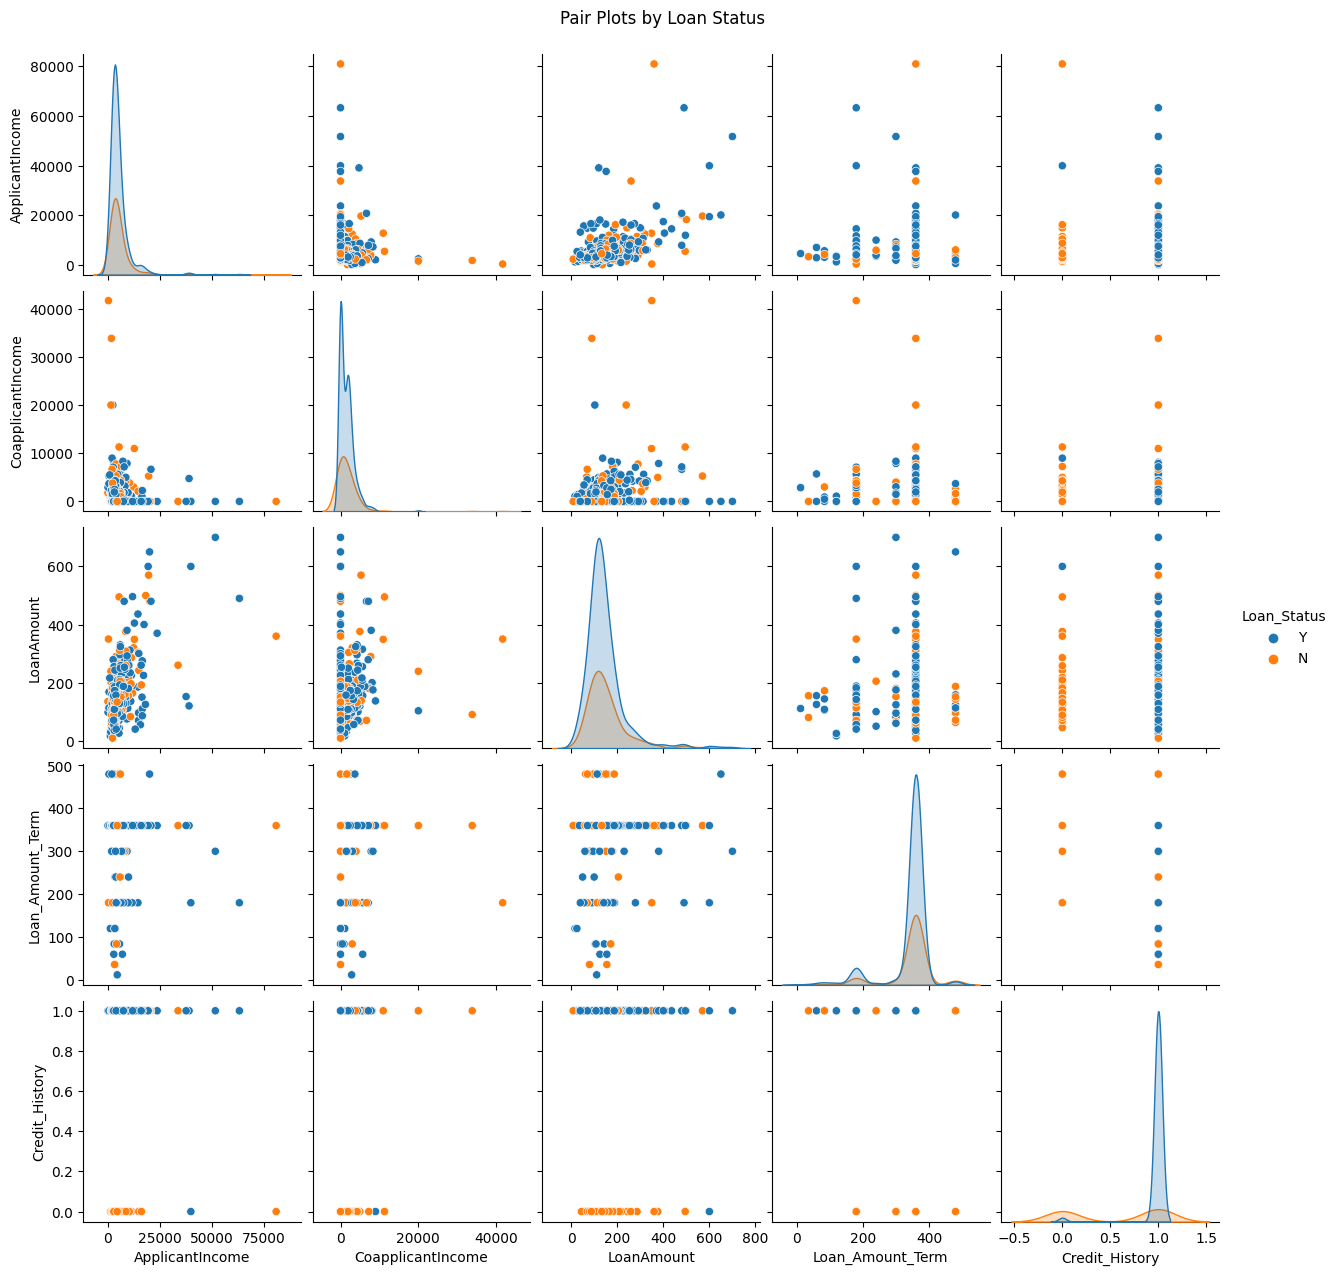

In [18]:
sb.pairplot(loan_df, hue='Loan_Status')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

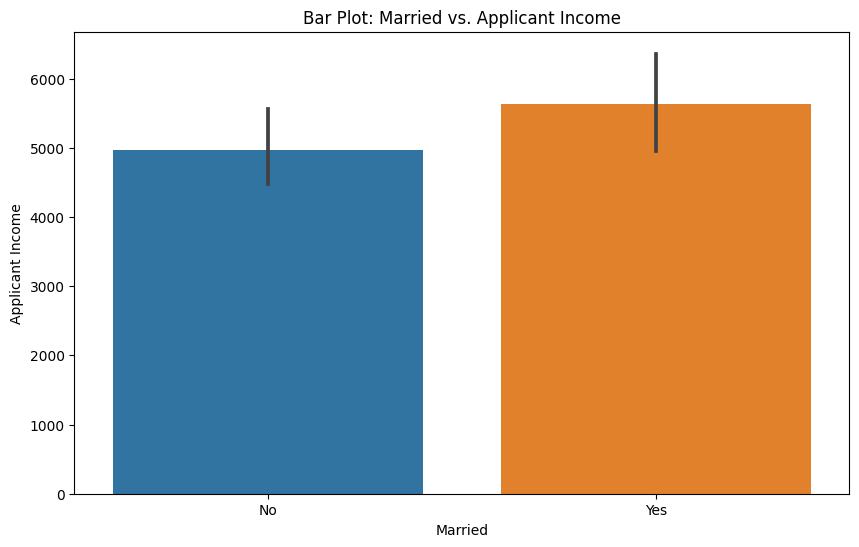

In [19]:
plt.figure(figsize=(10,6))
sb.barplot(data=loan_df, x='Married', y='ApplicantIncome')
plt.xlabel('Married')
plt.ylabel('Applicant Income')
plt.title('Bar Plot: Married vs. Applicant Income')
plt.show()

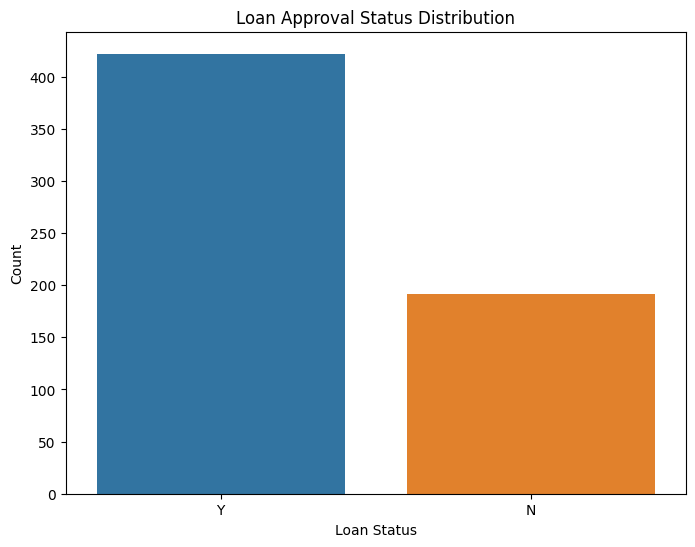

In [20]:
plt.figure(figsize=(8,6))
sb.countplot(data=loan_df, x='Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Approval Status Distribution')
plt.show()

Handling the missing values for categorical columns and numerical columns

In [21]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in categorical_columns:
    loan_df[col].fillna(loan_df[col].mode()[0], inplace=True)

for col in numerical_columns:
    loan_df[col].fillna(loan_df[col].median(), inplace=True)

Checking for remaining missing values

In [22]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Converting categorical columns to numerical using Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in col_to_encode:
  loan_df[i] = le.fit_transform(loan_df[i])

loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


Scaling numerical features using MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
loan_df[numerical_columns] = scaler.fit_transform(loan_df[numerical_columns])

# Feature Engineering

*   Created a new feature 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'
*   Applying log transformation to skewed features



In [25]:
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

skewed_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']
loan_df[skewed_features] = np.log1p(loan_df[skewed_features])

In [26]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,8.674197,0.000000,0.158894,0.555946,1.0,2,Y,8.674197
1,LP001003,1,1,1,0,0,8.430327,7.319202,0.158894,0.555946,1.0,0,N,8.714732
2,LP001005,1,1,0,0,1,8.006701,0.000000,0.079263,0.555946,1.0,2,Y,8.006701
3,LP001006,1,1,0,1,0,7.857094,7.765993,0.148969,0.555946,1.0,2,Y,8.505525
4,LP001008,1,0,0,0,0,8.699681,0.000000,0.174816,0.555946,1.0,2,Y,8.699681


 Splitting the dataset into features (X) and target (y)

In [27]:
X = loan_df.drop(['Loan_Status','Loan_ID'], axis=1)
y = loan_df['Loan_Status']

In [28]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,8.674197,0.000000,0.158894,0.555946,1.0,2,8.674197
1,1,1,1,0,0,8.430327,7.319202,0.158894,0.555946,1.0,0,8.714732
2,1,1,0,0,1,8.006701,0.000000,0.079263,0.555946,1.0,2,8.006701
3,1,1,0,1,0,7.857094,7.765993,0.148969,0.555946,1.0,2,8.505525
4,1,0,0,0,0,8.699681,0.000000,0.174816,0.555946,1.0,2,8.699681


Splitting the data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 12)
X_test shape: (123, 12)
y_train shape: (491,)
y_test shape: (123,)


Converting target labels to numerical using Label Encoding

In [30]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Model Building and Evaluation

*  Initializing and training classification models
*  Evaluating the models and displaying the results




In [31]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)
confusion_mat_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_rep_log)
print("Confusion Matrix:\n", confusion_mat_log)
print("\n")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_rep_rf)
print("Confusion Matrix:\n", confusion_mat_rf)
print("\n")

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_rep_xgb)
print("Confusion Matrix:\n", confusion_mat_xgb)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Classifier:")
print("Accuracy: ", accuracy_dt)
print("\nClassification Report: ", classification_rep_dt)
print("\nConfusion Matrix: \n", confusion_mat_dt)

gb_model = GaussianNB()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
print("\nGaussian NB:")
print("Accuracy: ", accuracy_gb)
print("\nClassification Report: ", classification_rep_gb)
print("\nConfusion Matrix: \n", confusion_mat_gb)

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)
confusion_mat_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_rep_svc)
print("\nConfusion Matrix: \n", confusion_mat_svc)


Logistic Regression:
Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
 [[18 25]
 [ 1 79]]



Random Forest Classifier:
Accuracy: 0.7723577235772358
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix:
 [[18 25]
 [ 3 77]]



XGBoost Classifier:
Accuracy: 0.7479674796747967
Classification Report:
               precision    recall  f1

Based on the evaluation metrics, Logistic Regression and Gaussian NB are looking better. However, Logistic Regression is slightly better. Hence, choosing the Logistic Regression model and performing Hyperparameter Tuning

# Hyperparameter Tuning

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.model_selection import GridSearchCV

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg_grid = GridSearchCV(log_reg_model, param_grid=log_reg_params, cv=3)

log_reg_grid.fit(X_train_scaled, y_train)

log_reg_best = log_reg_grid.best_estimator_

y_pred_log_reg = log_reg_best.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_}")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8146416280113721
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]


Training the final Logistic Regression model with best parameters and evaluating it on the test set

In [33]:
final_logreg_model = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

final_logreg_model.fit(X_train_scaled, y_train)

y_pred_final = final_logreg_model.predict(X_test_scaled)

accuracy_final = accuracy_score(y_test, y_pred_final)
classification_report_final = classification_report(y_test, y_pred_final)

print("Final Logistic Regression Model:")
print("Accuracy:", accuracy_final)
print("Classification Report:\n", classification_report_final)

Final Logistic Regression Model:
Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Plotting the ROC Curve and calculating AUC value

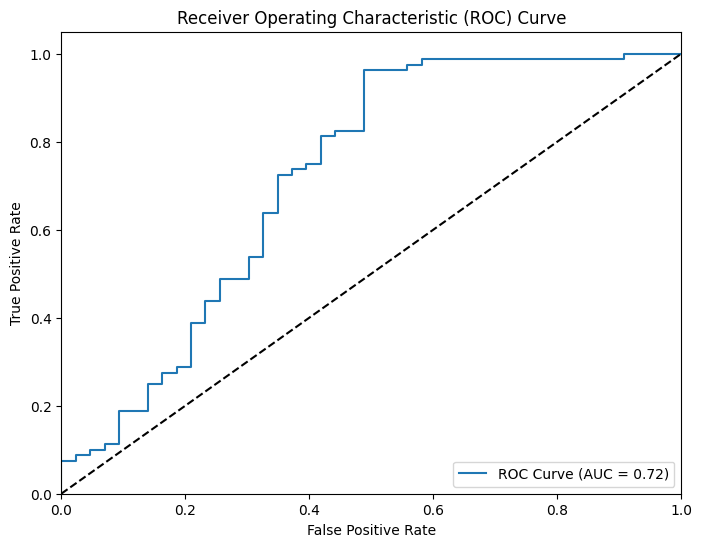

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_final = final_logreg_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_final)

auc_score = roc_auc_score(y_test, y_prob_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Saving the final model to a file using joblib

In [35]:
import joblib
joblib.dump(final_logreg_model, 'final_logreg_model.pkl')

['final_logreg_model.pkl']

Sample model prediction

In [36]:
final_logreg_model = joblib.load('final_logreg_model.pkl')

sample_features = np.array([1,	0,	0,	0,	0,	8.674197,	0.000000,	0.158894,	0.555946,	1.0,	2,	8.674197]).reshape(1, -1)

sample_features_scaled = scaler.transform(sample_features)

prediction = final_logreg_model.predict(sample_features_scaled)

if prediction[0] == 0:
    print("Predicted class: No Loan")
else:
    print("Predicted class: Loan Approved")

Predicted class: Loan Approved
